<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/HANDS-ON-DEEP-LEARNING-EXERCISES/blob/main/CHAPTER_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

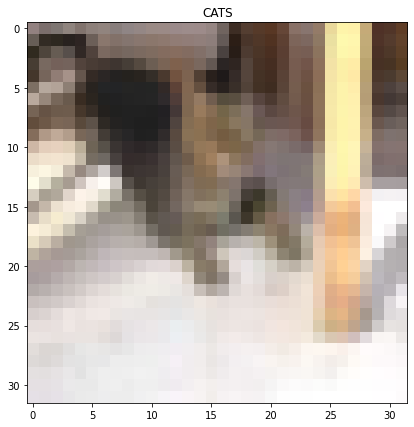

In [ ]:
def plot_random_image(x,y):
  import random
  i = random.randint(0,49999)
  plt.figure(figsize=(10,7))
  plt.imshow(x[i])
  plt.title(class_names[y[i][0]].upper())
plot_random_image(x_train,y_train)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
tensor = tf.constant(y_train)
y_train = tf.squeeze(tensor)
y_train[0]

<tf.Tensor: shape=(), dtype=uint8, numpy=6>

In [ ]:
x_train,x_test = tf.constant(x_train),tf.constant(x_test)
y_test = tf.constant(y_test)
y_test = tf.squeeze(y_test)
tf.shape(x_train),tf.shape(y_train)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([50000,    32,    32,     3], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([50000], dtype=int32)>)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships','trucks']
class_names[1]

'cars'

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',patience=27,mode='min',verbose=1)

In [ ]:
x_train.shape

TensorShape([50000, 32, 32, 3])

In [ ]:
initializer = tf.keras.initializers.HeNormal()
#20 layers with 100 neurons each
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer),
  tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer)
])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Nadam(),metrics = 'accuracy')
history = model.fit(x_train,y_train,validation_split=0.25,callbacks=[es],verbose=1,use_multiprocessing=True,epochs=30)

Epoch 1/30
1172/1172 [==============================] - 22s 16ms/step - loss: 2.1331 - accuracy: 0.2233 - val_loss: 1.9049 - val_accuracy: 0.2865
Epoch 2/30
1172/1172 [==============================] - 18s 16ms/step - loss: 1.8843 - accuracy: 0.3108 - val_loss: 1.8455 - val_accuracy: 0.3221
Epoch 3/30
1172/1172 [==============================] - 18s 16ms/step - loss: 1.8121 - accuracy: 0.3408 - val_loss: 1.8574 - val_accuracy: 0.3445
Epoch 4/30
1172/1172 [==============================] - 19s 17ms/step - loss: 1.7607 - accuracy: 0.3683 - val_loss: 1.7704 - val_accuracy: 0.3626
Epoch 5/30
1172/1172 [==============================] - 18s 16ms/step - loss: 1.7176 - accuracy: 0.3817 - val_loss: 1.7137 - val_accuracy: 0.3902
Epoch 6/30
1172/1172 [==============================] - 18s 16ms/step - loss: 1.6892 - accuracy: 0.3950 - val_loss: 1.7167 - val_accuracy: 0.3922
Epoch 7/30
1172/1172 [==============================] - 18s 16ms/step - loss: 1.6717 - accuracy: 0.4057 - val_loss: 1.7131 -

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6460 - accuracy: 0.4087


[1.6460150480270386, 0.40869998931884766]

Text(87.0, 0.5, 'TRUE LABEL')

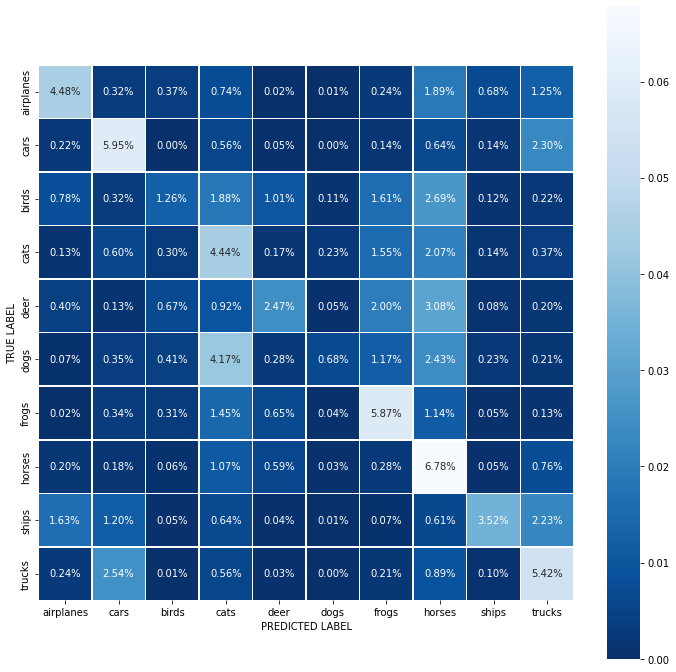

In [ ]:
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred.argmax(axis=1))
plt.figure(figsize = (12,12))
sns.heatmap(cm/np.sum(cm),annot = True,fmt = '.2%',linewidths=0.5,square=True,cmap='Blues_r',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")

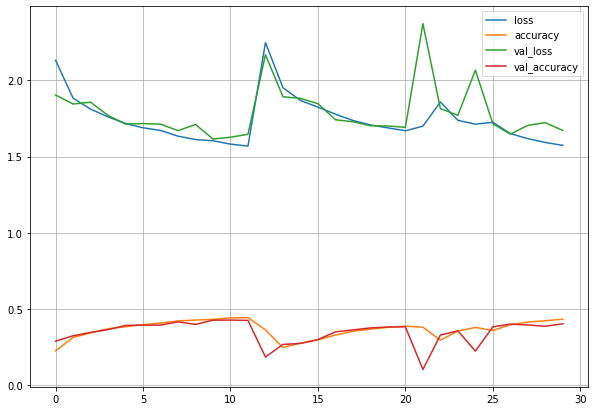

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)

In [ ]:
initializer = tf.keras.initializers.HeNormal()
model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100,activation='elu',kernel_initializer=initializer,use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer)
])
model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Nadam(),metrics = 'accuracy')
history2 = model2.fit(x_train,y_train,validation_split=0.25,callbacks=[es],verbose=1,use_multiprocessing=True,epochs=30)

Epoch 1/30
1172/1172 [==============================] - 52s 37ms/step - loss: 1.9230 - accuracy: 0.3125 - val_loss: 1.7414 - val_accuracy: 0.3776
Epoch 2/30
1172/1172 [==============================] - 41s 35ms/step - loss: 1.7273 - accuracy: 0.3854 - val_loss: 1.6339 - val_accuracy: 0.4126
Epoch 3/30
1172/1172 [==============================] - 42s 36ms/step - loss: 1.6577 - accuracy: 0.4092 - val_loss: 1.5976 - val_accuracy: 0.4290
Epoch 4/30
1172/1172 [==============================] - 43s 36ms/step - loss: 1.6046 - accuracy: 0.4308 - val_loss: 1.5681 - val_accuracy: 0.4503
Epoch 5/30
1172/1172 [==============================] - 42s 36ms/step - loss: 1.5640 - accuracy: 0.4451 - val_loss: 1.5710 - val_accuracy: 0.4358
Epoch 6/30
1172/1172 [==============================] - 43s 37ms/step - loss: 1.5274 - accuracy: 0.4587 - val_loss: 1.5490 - val_accuracy: 0.4484
Epoch 7/30
1172/1172 [==============================] - 42s 36ms/step - loss: 1.4974 - accuracy: 0.4716 - val_loss: 1.4931 -

In [ ]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4173 - accuracy: 0.5196


[1.4172862768173218, 0.519599974155426]

Text(87.0, 0.5, 'TRUE LABEL')

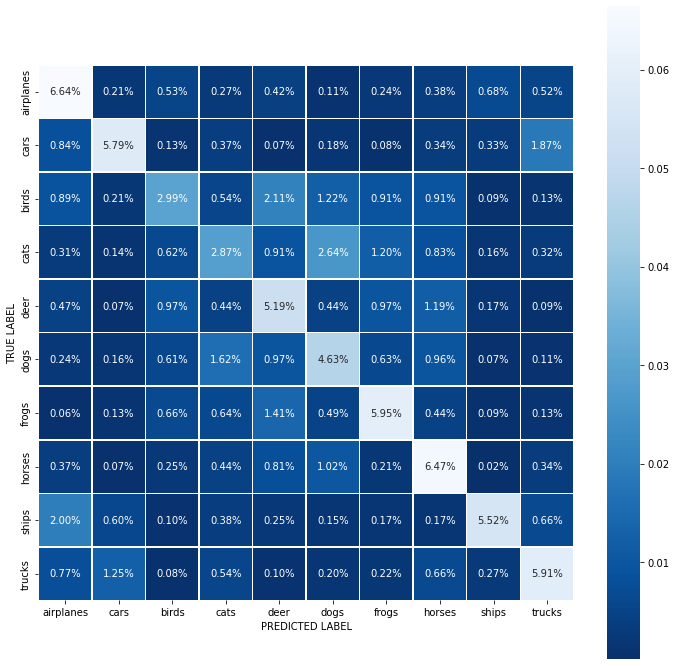

In [ ]:
y_pred = model2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred.argmax(axis=1))
plt.figure(figsize = (12,12))
sns.heatmap(cm/np.sum(cm),annot = True,fmt = '.2%',linewidths=0.5,square=True,cmap='Blues_r',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")

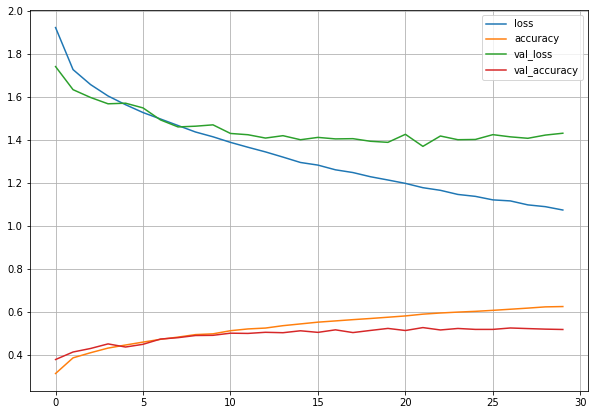

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(10,7))
plt.grid(True)

In [ ]:
initializer = tf.keras.initializers.LecunNormal()
#20 layers with 100 neurons each
model3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(100,activation='selu',kernel_initializer=initializer),
  tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer)
])
model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Nadam(),metrics = 'accuracy')
history3 = model3.fit(x_train,y_train,validation_split=0.25,callbacks=[es],verbose=1,use_multiprocessing=True,epochs=30)

Epoch 1/30
1172/1172 [==============================] - 30s 16ms/step - loss: 2.1873 - accuracy: 0.1624 - val_loss: 2.1651 - val_accuracy: 0.1572
Epoch 2/30
1172/1172 [==============================] - 18s 16ms/step - loss: 2.0853 - accuracy: 0.1882 - val_loss: 2.0192 - val_accuracy: 0.2012
Epoch 3/30
1172/1172 [==============================] - 18s 16ms/step - loss: 2.0166 - accuracy: 0.2155 - val_loss: 1.9653 - val_accuracy: 0.2400
Epoch 4/30
1172/1172 [==============================] - 18s 16ms/step - loss: 2.0047 - accuracy: 0.2166 - val_loss: 2.0026 - val_accuracy: 0.2391
Epoch 5/30
1172/1172 [==============================] - 18s 15ms/step - loss: 2.0015 - accuracy: 0.2204 - val_loss: 2.0057 - val_accuracy: 0.2278
Epoch 6/30
1172/1172 [==============================] - 18s 15ms/step - loss: 2.0262 - accuracy: 0.2165 - val_loss: 2.3165 - val_accuracy: 0.1156
Epoch 7/30
1172/1172 [==============================] - 18s 16ms/step - loss: 2.0515 - accuracy: 0.1986 - val_loss: 1.9641 -

In [ ]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.9008 - accuracy: 0.2687


[1.9008299112319946, 0.2687000036239624]

Text(87.0, 0.5, 'TRUE LABEL')

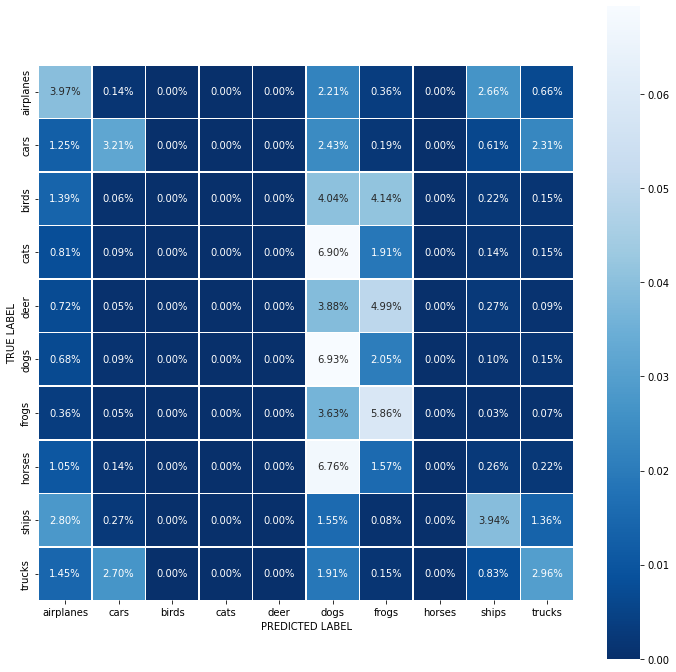

In [ ]:
y_pred = model3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred.argmax(axis=1))
plt.figure(figsize = (12,12))
sns.heatmap(cm/np.sum(cm),annot = True,fmt = '.2%',linewidths=0.5,square=True,cmap='Blues_r',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")

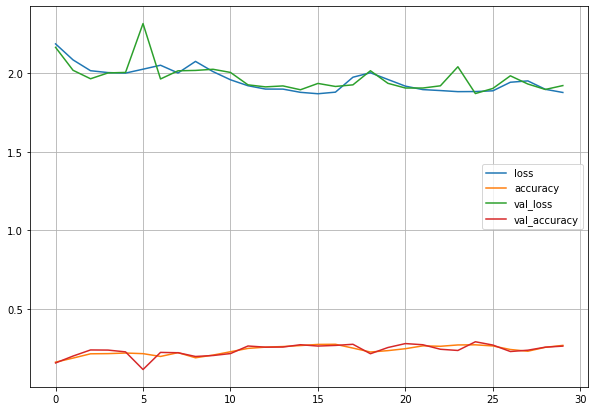

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(10,7))
plt.grid(True)